In [1]:
from Yugiquery import *
header('Timeline')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Timeline - Last modified: 02/01/2023 13:31 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

# Load data

In [2]:
# Load list of important dates
dates_df = pd.read_csv('../Assets/dates.csv', parse_dates=['begin','end'], dayfirst=True, index_col='name').sort_values(['type','begin','end'])
anime_df = dates_df[dates_df['type']=='series']
rules_df = dates_df[dates_df['type']=='rules'][2:]

In [3]:
# Get list of files
all_cards_files = sorted(glob.glob('../Data/All_cards_*.csv'), key=os.path.getctime, reverse=True)
set_lists_files = sorted(glob.glob('../Data/All_sets_*.csv'), key=os.path.getctime, reverse=True)
# Get newest file if exist
if len(all_cards_files)>0:
    all_cards_df = pd.read_csv(all_cards_files[0], dtype=object)
    # Correct tuples
    all_cards_df['Effect type'] = all_cards_df['Effect type'].dropna().apply(literal_eval)
    all_cards_df['Link Arrows'] = all_cards_df['Link Arrows'].dropna().apply(literal_eval)
    all_cards_df['Archseries'] = all_cards_df['Archseries'].dropna().apply(literal_eval)
    all_cards_df['Artwork'] = all_cards_df['Artwork'].dropna().apply(literal_eval)
    all_cards_df['Errata'] = all_cards_df['Errata'].dropna().apply(literal_eval)
    print('Cards file loaded')
else:
    all_cards_df = None
    print('No cards files')
    
if len(set_lists_files)>0:
    set_lists_df = pd.read_csv(set_lists_files[0], dtype=object)
    # Correct tuples
    set_lists_df['Rarity'] = set_lists_df['Rarity'].dropna().apply(literal_eval)
    set_lists_df['Cover card'] = set_lists_df['Cover card'].dropna().apply(literal_eval)
    print('Sets file loaded')
else:
    set_lists_df = None
    print('No set lists files')

Cards file loaded
Sets file loaded


In [4]:
if all_cards_df is not None and set_lists_df is not None:
    all_cards_df['index'] = all_cards_df['Name'].str.lower()
    set_lists_df['index'] = set_lists_df['Name'].str.lower()
    all_cards_df['Modification date'] = pd.to_datetime(all_cards_df['Modification date'])
    set_lists_df['Modification date'] = pd.to_datetime(set_lists_df['Modification date'])
    set_lists_df['Release'] = pd.to_datetime(set_lists_df['Release'])
    full_df = all_cards_df.merge(set_lists_df, indicator = True, how='outer', on='index')
    full_df = full_df.convert_dtypes()
    full_df['Modification date'] = full_df[['Modification date_x','Modification date_y']].max(axis=1)
    full_df['Name'] = full_df['Name_x'].fillna(full_df['Name_y'])
    full_df.drop(['index', 'Name_x', 'Name_y', 'Modification date_x', 'Modification date_y'], axis=1, inplace = True)
    full_df = full_df[np.append(full_df.columns[-1:],full_df.columns[:-1])]
    
else:
    raise SystemExit("Not enough files to proceed. Aborting!")

# Data visualization

In [5]:
pd.set_option('display.max_columns', 40)
full_df

Name  Password   Card type  \
0               "A" Cell Breeding Device  34541863  Spell Card   
1               "A" Cell Breeding Device  34541863  Spell Card   
2               "A" Cell Breeding Device  34541863  Spell Card   
3               "A" Cell Breeding Device  34541863  Spell Card   
4               "A" Cell Breeding Device  34541863  Spell Card   
...                                  ...       ...         ...   
157249                 Magiquartet Shock      <NA>        <NA>   
157250                 Magiquartet Shock      <NA>        <NA>   
157251  Ultimate Flag Beast Surge Bicorn      <NA>        <NA>   
157252                   The☆Star Dragon      <NA>        <NA>   
157253                  Handsray Destleo      <NA>        <NA>   

                     Property Primary type Secondary type Attribute  \
0       Continuous Spell Card         <NA>           <NA>      <NA>   
1       Continuous Spell Card         <NA>           <NA>      <NA>   
2       Continuous Spell Card         <NA>           <NA>      <NA>   
3       Continuous Spell Card         <NA>           <NA>      <NA>   
4       Continuous Spell Card         <NA>           <NA>      <NA>   
...                       ...          ...            ...       ...   
157249                   <NA>         <NA>           <NA>      <NA>   
157250                   <NA>         <NA>           <NA>      <NA>   
157251                   <NA>         <NA>           <NA>      <NA>   
157252                   <NA>         <NA>           <NA>      <NA>   
157253                   <NA>         <NA>           <NA>      <NA>   

       Monster type Level/Rank   ATK   DEF Pendulum Scale  Link Link Arrows  \
0              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
1              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
2              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
3              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
4              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
...             ...        ...   ...   ...            ...   ...         ...   
157249         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
157250         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
157251         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
157252         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
157253         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   

              Effect type Archseries Artwork   Errata TCG status OCG status  \
0       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
1       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
2       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
3       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
4       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
...                   ...        ...     ...      ...        ...        ...   
157249                NaN        NaN     NaN      NaN       <NA>       <NA>   
157250                NaN        NaN     NaN      NaN       <NA>       <NA>   
157251                NaN        NaN     NaN      NaN       <NA>       <NA>   
157252                NaN        NaN     NaN      NaN       <NA>       <NA>   
157253                NaN        NaN     NaN      NaN       <NA>       <NA>   

                                    Set    Card number  \
0                  Force of the Breaker     FOTB-JP043   
1                  Force of the Breaker     FOTB-SP043   
2                  Force of the Breaker     FOTB-DE043   
3                  Force of the Breaker     FOTB-FR043   
4                  Force of the Breaker     FOTB-EN043   
...                                 ...            ...   
157249                   Gold Rush Pack  RD/GRP1-JP055   
157250                   Gol

## First releases

Obs: Only the first release of an individual card name

### Total

In [6]:
release=full_df[full_df['Release'].notna()].groupby('Name')['Release'].agg(['min','idxmin','max','idxmax'])
release

min  idxmin        max  idxmax
Name                                                               
"A Legendary Ocean"           2005-07-27  155368 2005-07-27  155368
"A" Cell Breeding Device      2007-02-15       0 2014-03-26       7
"A" Cell Incubator            2007-07-21      15 2012-05-12      17
"A" Cell Recombination Device 2016-07-09      18 2016-11-04      20
"A" Cell Scatter Burst        2006-11-16      29 2014-03-26      33
...                                  ...     ...        ...     ...
Zubaba General                2012-12-22  137569 2016-02-12  137560
Zubaba Knight                 2011-03-19  137596 2013-11-25  137610
Zubababancho Gagagacoat       2019-11-09  137621 2020-02-05  137622
Zure, Knight of Dark World    2005-08-11  105711 2018-06-30  105732
Zushin the Sleeping Giant     2016-05-14  137629 2020-09-10  137631

[12401 rows x 4 columns]

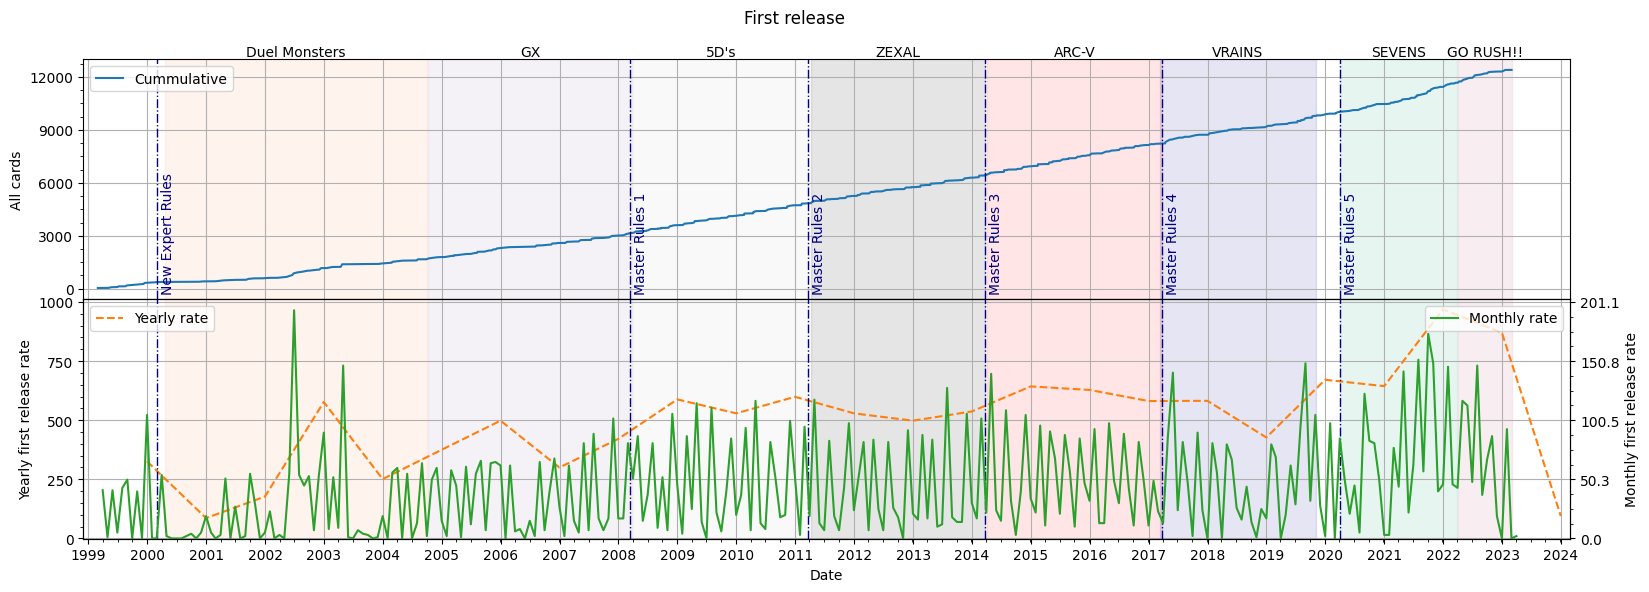

In [7]:
min_release = release['min'].sort_values().value_counts(sort=False).to_frame(name='All cards')
min_release.index.name = 'First Release'
rate_plot(min_release, bg=anime_df, vlines = rules_df['begin'])

### Total by Region

In [8]:
release_region=full_df[full_df['Release'].notna()].groupby(['Region','Name'])['Release'].agg(['min','idxmin','max','idxmax'])
release_region

min  idxmin        max  idxmax
Region Name                                                            
AE     3-Hump Lacooda             2004-10-14  114827 2004-10-14  114827
       7                          2004-10-14      73 2004-10-14      73
       7 Colored Fish             2002-10-24  105747 2002-10-24  105747
       8-Claws Scorpion           2003-10-23   77399 2003-10-23   77399
       A Cat of Ill Omen          2003-10-23   81443 2003-10-23   81443
...                                      ...     ...        ...     ...
TC     ZW - Lightning Blade       2015-12-05   77236 2015-12-05   77236
       ZW - Tornado Bringer       2015-12-05  154711 2015-12-05  154711
       ZW - Ultimate Shield       2015-12-05  137268 2015-12-05  137268
       Zerozerock                 2015-12-05   32374 2015-12-05   32374
       Zure, Knight of Dark World 2015-03-01  105728 2015-03-01  105728

[83637 rows x 4 columns]

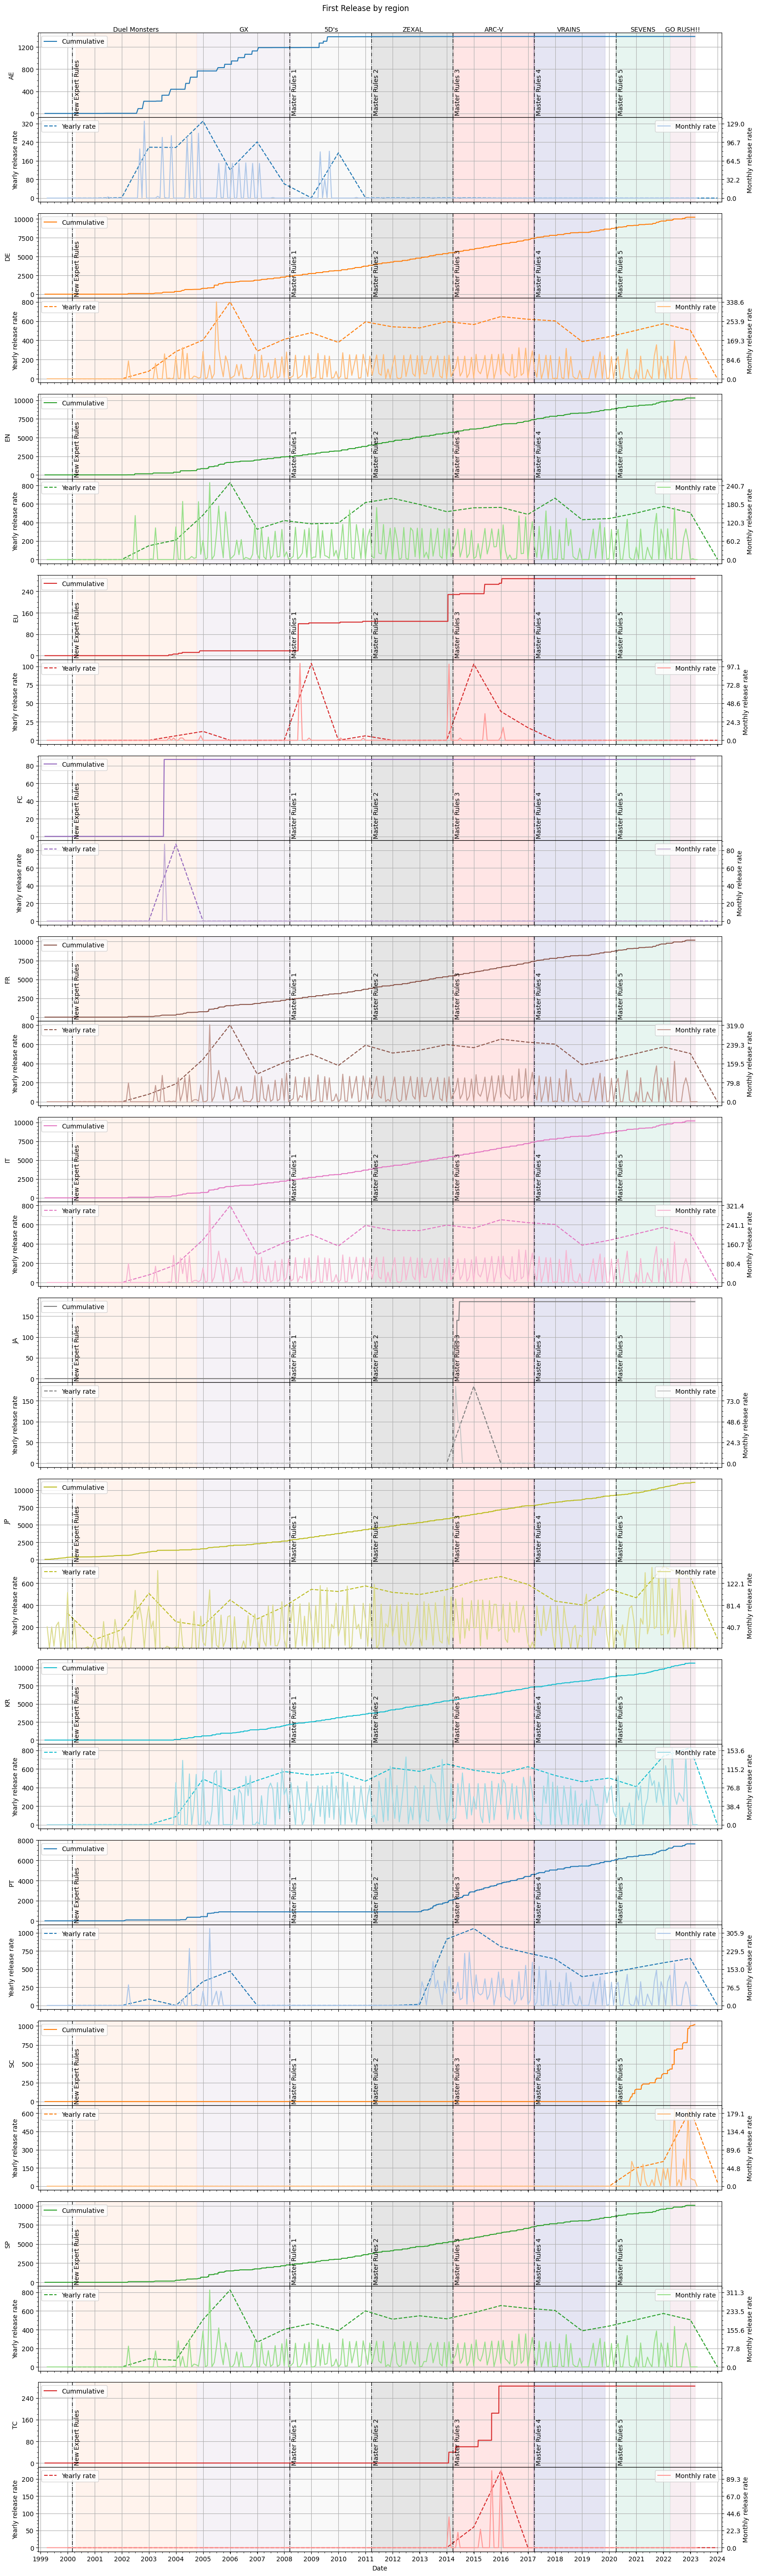

In [9]:
min_release_region = release_region['min'].sort_values().groupby(['Region']).value_counts(sort=False).unstack(0).fillna(0).round(0)
min_release_region.index.name = 'Release'
rate_subplots(min_release_region, title = 'First Release', bg=anime_df, vlines = rules_df['begin'])

In [10]:
# full_df.iloc[release_region['idxmin']['JP']['Dark Magician']]

## All Releases

Obs: All releases includes reprints

### By card type

In [11]:
# All releases, includes reprints - Double check
release_card_type = full_df.groupby(['Card type','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0).astype(int)
release_card_type.groupby(release_card_type.index.strftime('%Y')).sum().T

Release       1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Card type                                                                  
Monster Card   281   228   197   830  1242  2394  2246  1737  1901  1953   
Spell Card      47    65    71   301   407   969   939   735   783   705   
Trap Card       21    25    45   161   323   745   707   569   654   595   

Release       2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
Card type                                                                  
Monster Card  1784  2195  2605  3600  3067  3773  3120  3014  2169  1353   
Spell Card     633   577   718  1030   766  1044   961   984   653   478   
Trap Card      555   547   623   799   623   871   729   745   496   295   

Release       2019  2020  2021  2022  2023  
Card type                                   
Monster Card  1702  1252  1289  1952    57  
Spell Card     604   453   529   651    18  
Trap Card      359   246   250   312     7

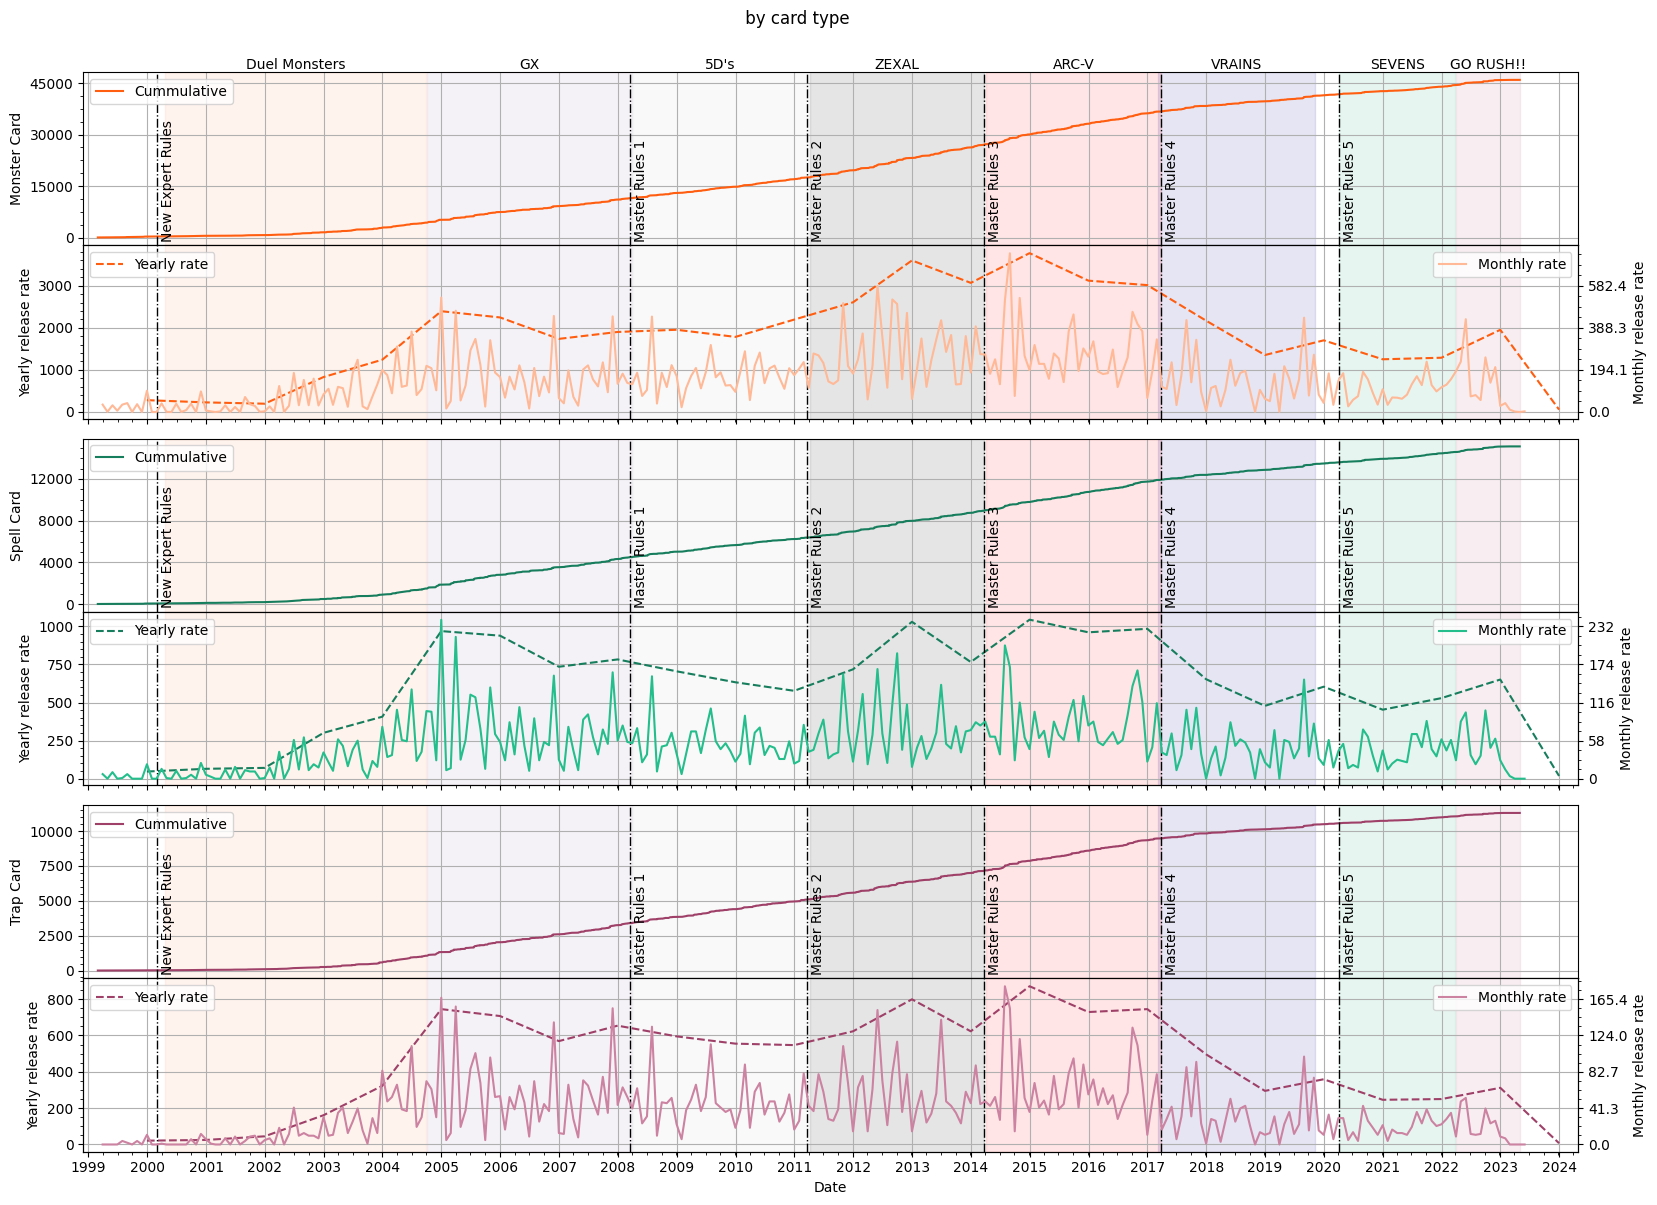

In [12]:
card_type_colors = [colors_dict[col] for col in release_card_type.columns]
rate_subplots(release_card_type, colors=card_type_colors, bg=anime_df, vlines = rules_df['begin'])

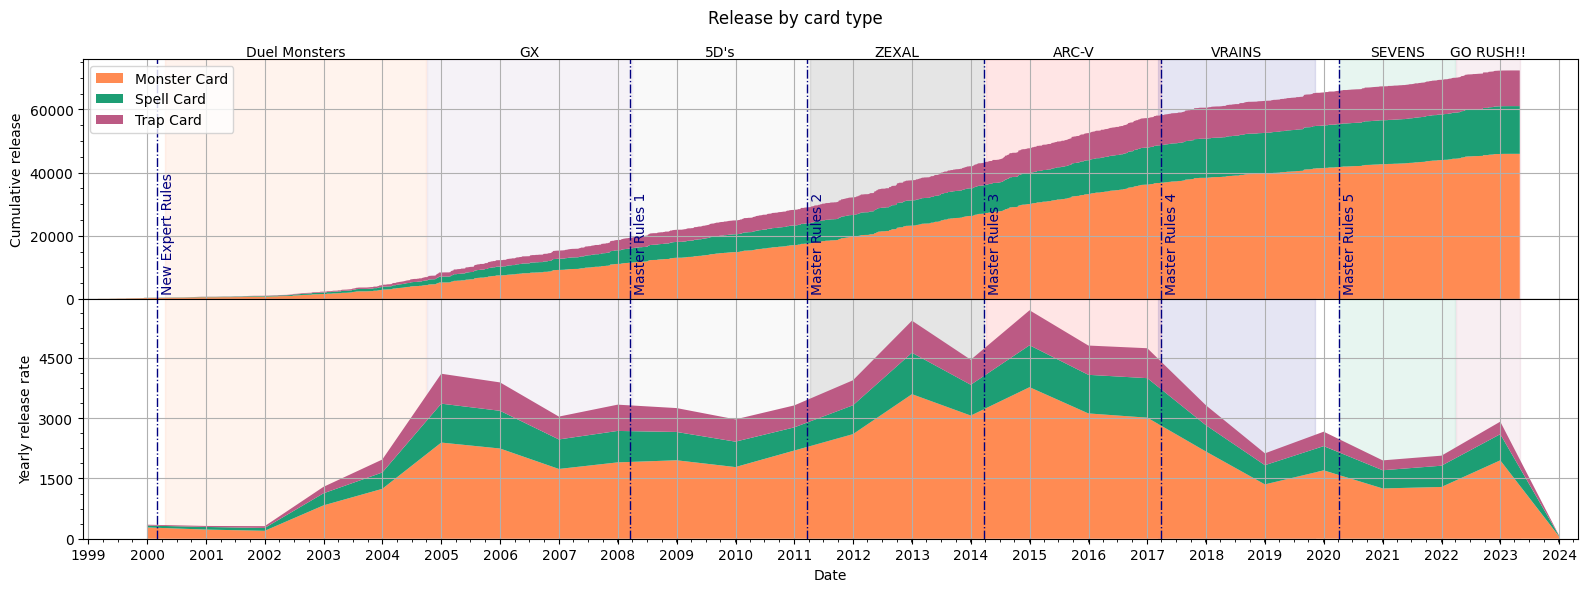

In [13]:
rate_plot(release_card_type, colors=card_type_colors, bg=anime_df, vlines = rules_df['begin'])

### By primary type

In [14]:
# All releases, includes reprints - Double check
# Sort properly
release_primary_type = full_df.groupby(['Primary type','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0).astype(int)
release_primary_type.groupby(release_primary_type.index.strftime('%Y')).sum().T

Release          1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Primary type                                                                  
Effect Monster     42    46    94   370   703  1556  1779  1349  1558  1602   
Fusion Monster     18    16    17    49    77   118   112   135   181   108   
Link Monster        0     0     0     0     0     0     0     0     0     0   
Normal Monster    219   161    84   402   451   699   330   232   148   148   
Ritual Monster      2     9     2    10    11    22    26    21    14    11   
Synchro Monster     0     0     0     0     0     0     0     0     0    85   
Xyz Monster         0     0     0     0     0     0     0     0     0     0   

Release          2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
Primary type                                                                  
Effect Monster   1514  1758  2051  2764  2237  2804  2154  2128  1530   826   
Fusion Monster     33    62   142   106    34   125   196   222   155    56   
Link Monster        0     0     0     0     0     0     0     0   100   257   
Normal Monster     76   115   105   194   138   142   284   225    82    63   
Ritual Monster      7    14    11    32    17    20    70    40    29    57   
Synchro Monster   154   248   207   169   108   247   193   162   113    55   
Xyz Monster         0     0    90   338   533   436   231   238   160    39   

Release          2019  2020  2021  2022  2023  
Primary type                                   
Effect Monster   1085   764   838  1244    28  
Fusion Monster     92    83    70   153     2  
Link Monster      279   161    77   109     3  
Normal Monster     26    65    71   121     9  
Ritual Monster     45    38    25    37     5  
Synchro Monster    85    53   100   153     6  
Xyz Monster        90    91   108   135     5

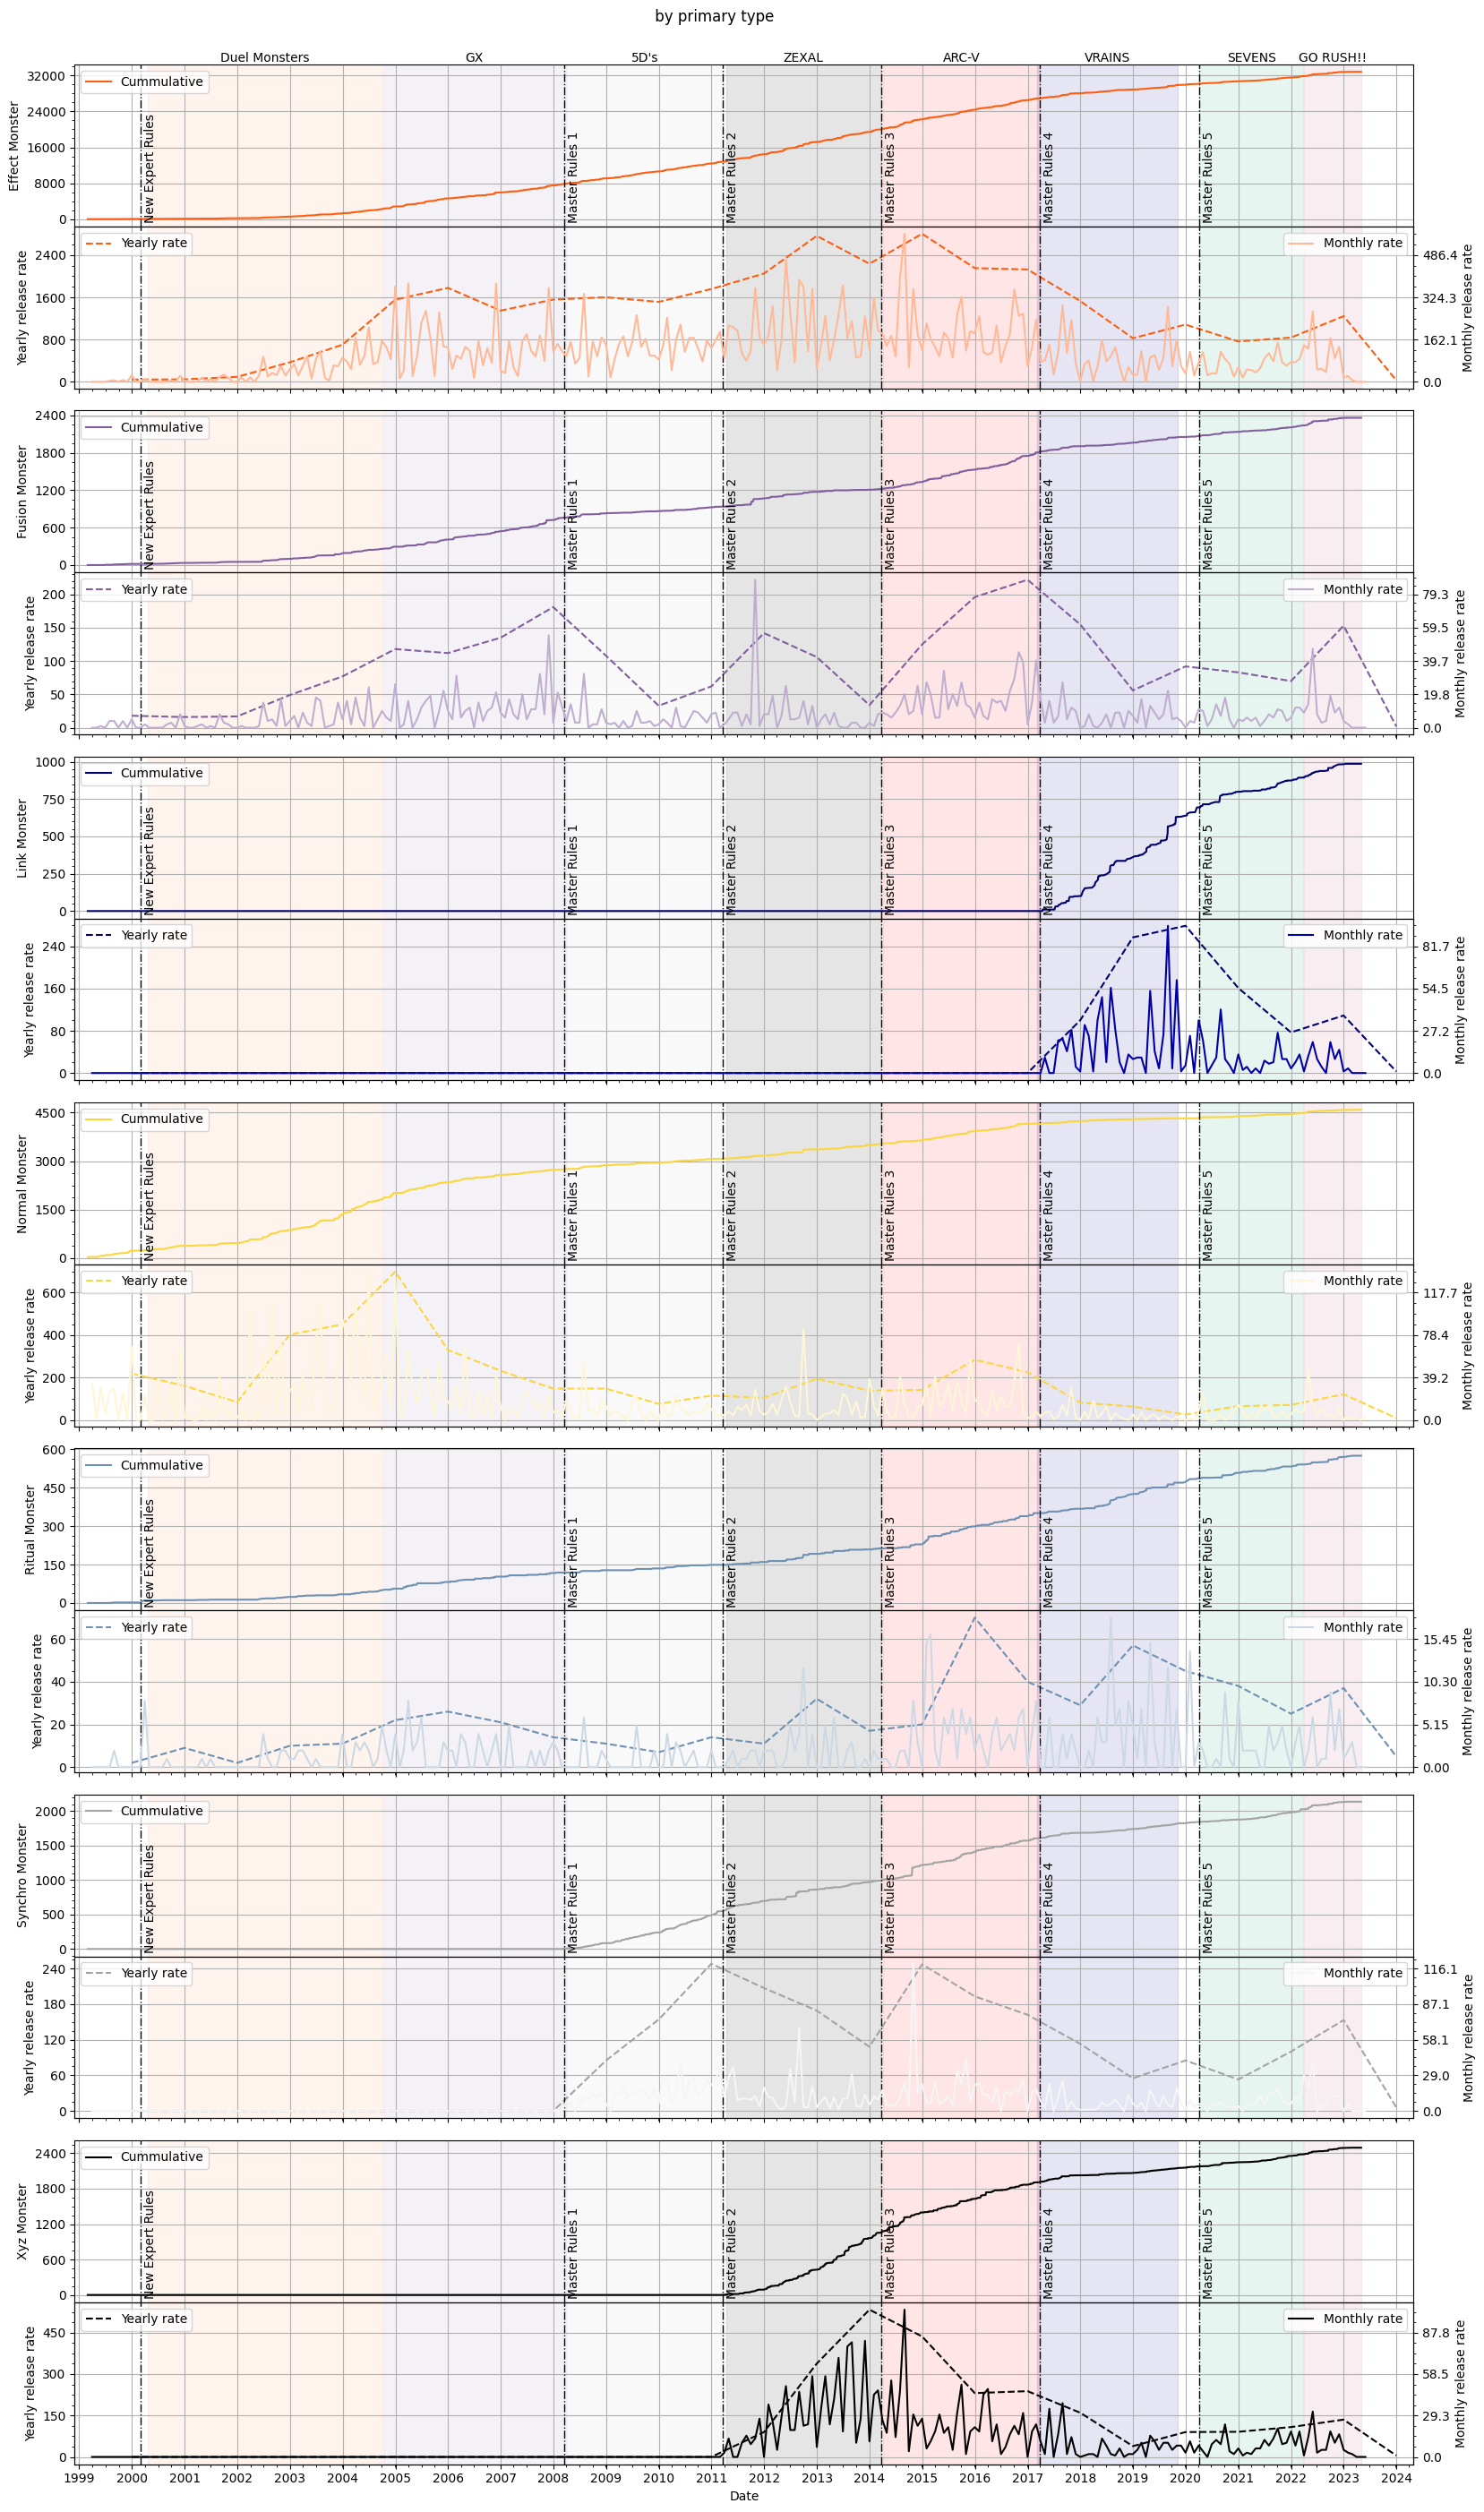

In [15]:
primary_type_colors = [colors_dict[col] for col in release_primary_type.columns]
rate_subplots(release_primary_type, colors=primary_type_colors, bg=anime_df, vlines=rules_df['begin'])

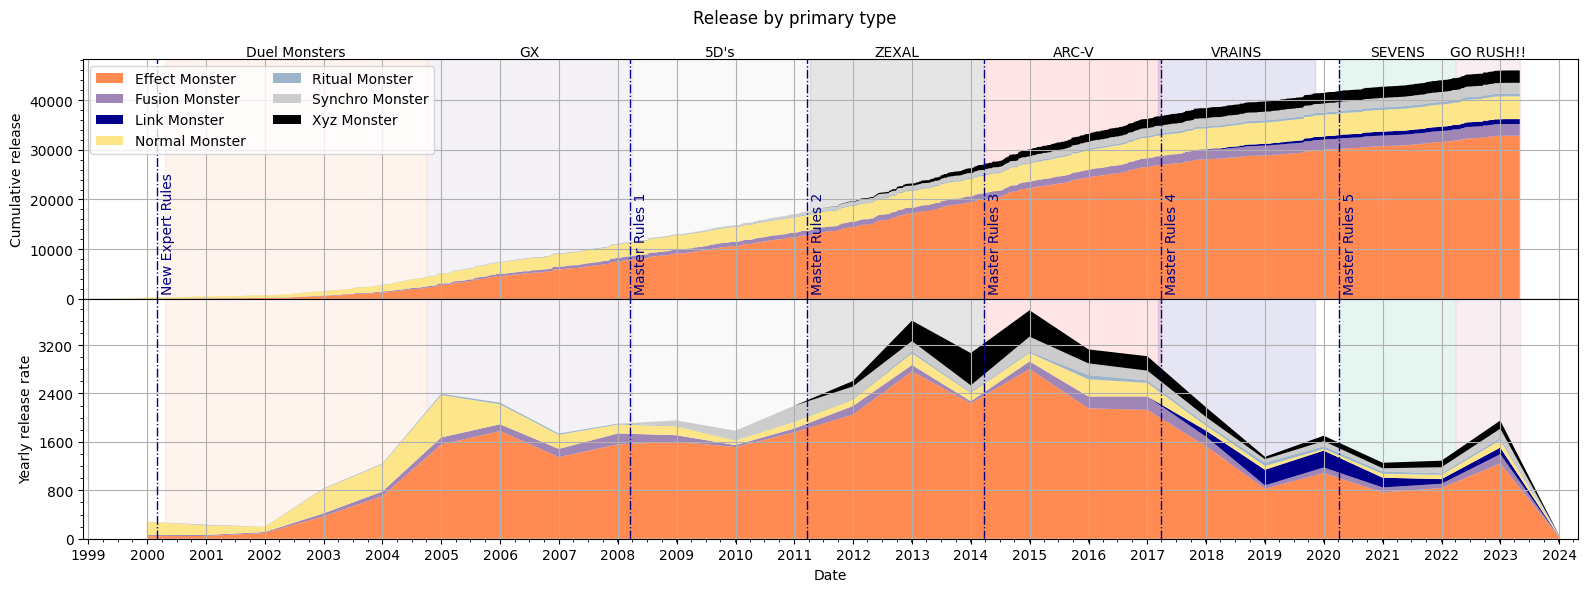

In [16]:
rate_plot(release_primary_type, colors=primary_type_colors, bg=anime_df, vlines = rules_df['begin'])

### By secondary type

In [17]:
# All releases, includes reprints - Double check
# Sort properly
release_secondary_type = full_df.groupby(['Secondary type','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0).astype(int)
release_secondary_type.groupby(release_secondary_type.index.strftime('%Y')).sum().T

Release         1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Secondary type                                                               
Flip monster      10    13    17    69   103   201   133    94    55    83   
Gemini monster     0     0     0     0     0     0     0     0    70    23   
Spirit monster     0     0     0     0    15    14    30    14     8     9   
Toon monster       0     0     0     4     8    26    10     9     1     8   
Tuner monster      0     0     0     0     0     0     0     0     0   101   
Union monster      0     0     0    10     4    15    51    25    20    10   

Release         2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
Secondary type                                                               
Flip monster      51    55    61   108    54    97    61    37    71    23   
Gemini monster    21     1     7    33    23    12    15    43     7     1   
Spirit monster    16     5    11    16    15     5     1    13    36    13   
Toon monster       0     1     3    19     3     3    24    21     6     0   
Tuner monster    189   329   297   186   110   245   208   166   132    74   
Union monster      5    23     9    19     3     9     1    34     4     1   

Release         2019  2020  2021  2022  2023  
Secondary type                                
Flip monster      16     9    18    24     0  
Gemini monster     0     2     3     1     0  
Spirit monster     0     0     3     7     1  
Toon monster       2     1     0     2     0  
Tuner monster     95    82   120   193     5  
Union monster      6     6     2     4     0

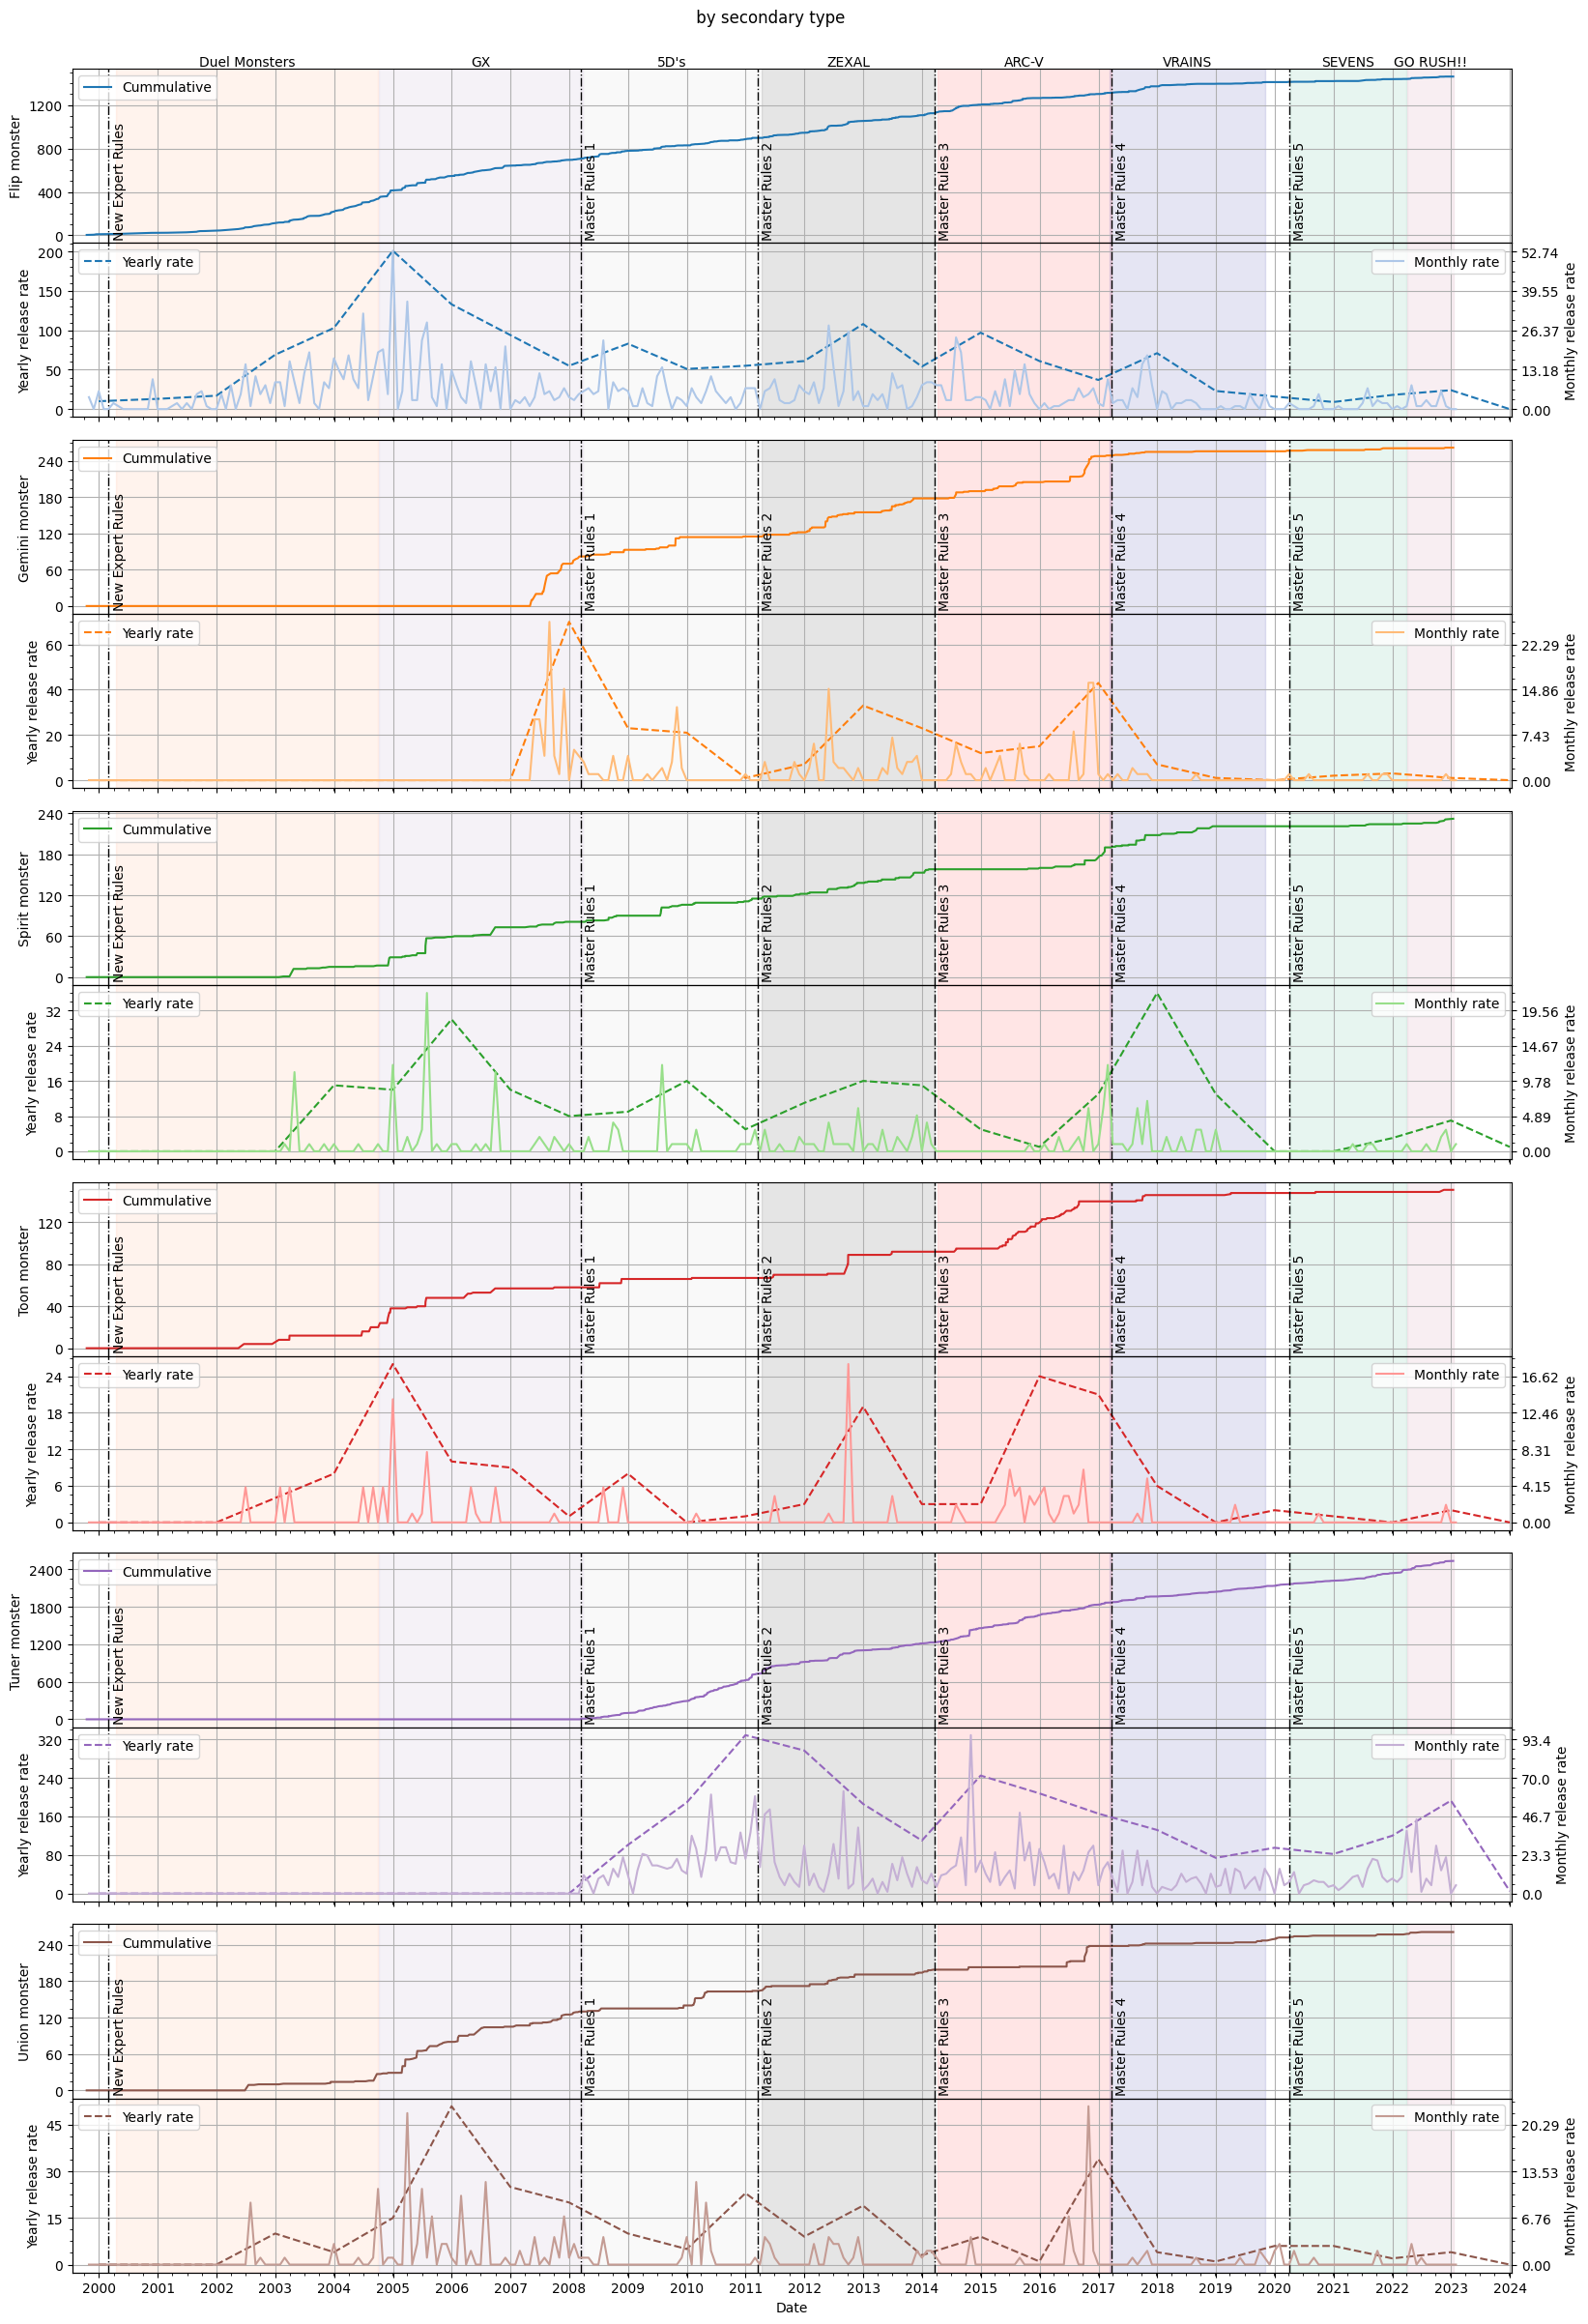

In [18]:
rate_subplots(release_secondary_type, bg=anime_df, vlines = rules_df['begin'])

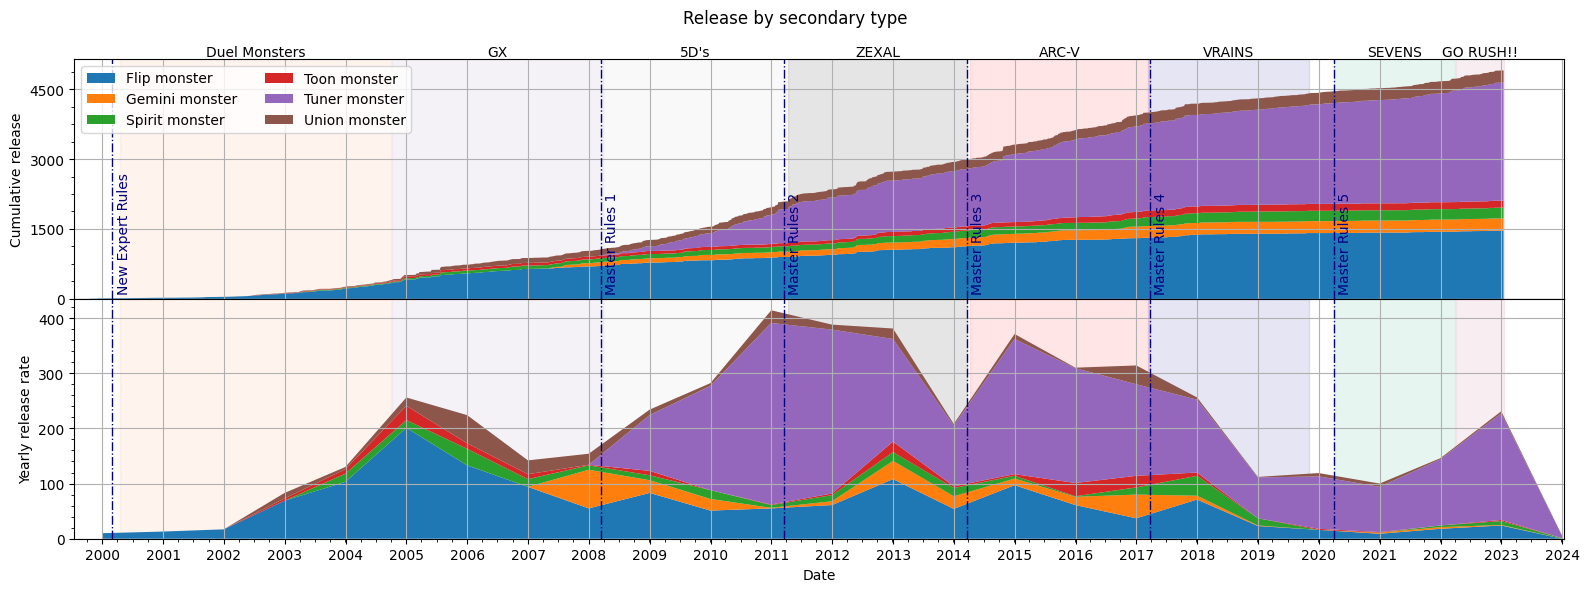

In [19]:
rate_plot(release_secondary_type, bg=anime_df, vlines = rules_df['begin'])

### By attribute

In [20]:
# All releases, includes reprints - Double check
# Sort properly
release_attribute = full_df.groupby(['Attribute','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0).astype(int)
release_attribute.groupby(release_attribute.index.strftime('%Y')).sum().T

Release    1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
Attribute                                                                     
DARK         80    75    53   276   391   702   588   386   431   566   482   
DIVINE        0     3     0     0     3     1     1     0     0     4     1   
EARTH       101    82    69   262   383   666   646   496   464   470   480   
FIRE          9     5    11    37    72   170   175   155   180   138   152   
LIGHT        26    20    20   111   160   372   439   363   419   450   321   
WATER        44    27    18    70   116   244   215   140   232   147   163   
WIND         21    16    26    74   117   239   182   197   175   178   185   

Release    2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  \
Attribute                                                                     
DARK        558   679   866   726   981   917  1108   710   449   624   358   
DIVINE        9     5     7     6    17    15    16     7     0    11     6   
EARTH       620   602   837   601   996   662   593   494   211   284   254   
FIRE        139   227   307   386   263   267   206   123    88   123   108   
LIGHT       479   547   861   778   922   692   696   442   362   393   241   
WATER       136   236   474   295   275   264   231   199    71   122   179   
WIND        254   309   248   275   319   303   164   194   172   145   106   

Release    2021  2022  2023  
Attribute                    
DARK        320   645    20  
DIVINE        2     2     0  
EARTH       174   372    12  
FIRE        105   124     3  
LIGHT       282   365    17  
WATER       205   224     2  
WIND        201   220     3

In [ ]:
attribute_colors = [colors_dict[col] for col in release_attribute.columns]
rate_subplots(release_attribute, colors=attribute_colors, bg=anime_df, vlines = rules_df['begin'])

In [ ]:
rate_plot(release_attribute, colors = attribute_colors, bg=anime_df, vlines = rules_df['begin'], cumsum=True)

### By monster type

In [ ]:
# All releases, includes reprints - Double check
# Sort properly
release_monster_type = full_df.groupby(['Monster type','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0).astype(int)
release_monster_type.groupby(release_monster_type.index.strftime('%Y')).sum().T

In [ ]:
rate_subplots(release_monster_type, bg=anime_df, vlines = rules_df['begin'])

### By Level/Rank

In [ ]:
# Testing
def boxplot(df):
    col = df.columns[0]
    df['Year'] = df.index.strftime('%Y')
    df.dropna(inplace=True)

    ax = df.boxplot(by='Year', figsize=(16,10))

    mean = df.groupby('Year').mean()

    ax.plot(list(range(1,len(mean.index)+1)), mean.values, c='r', ls='--', alpha=0.5)
    
    ticks = np.arange(0,df[col].max()+1,1)
    if len(ticks)>15:
        ax.yaxis.set_major_locator(MaxNLocator(11, integer=True))
        ax.yaxis.set_minor_locator(AutoMinorLocator())
    else:
        ax.yaxis.set_major_locator(FixedLocator(ticks))
        
    # ax.set_ylim([0,5000])
    plt.tight_layout()
    plt.show()

In [ ]:
level_box = pd.to_numeric(full_df.set_index('Release')['Level/Rank'], errors='coerce').to_frame().sort_index().dropna()
boxplot(level_box)

### By ATK

In [ ]:
atk_box = pd.to_numeric(full_df.set_index('Release')['ATK'], errors='coerce').to_frame().sort_index().dropna()
boxplot(atk_box)

### By DEF

In [ ]:
def_box = pd.to_numeric(full_df.set_index('Release')['DEF'], errors='coerce').to_frame().sort_index().dropna()
boxplot(def_box)

### By pendulum scale

In [ ]:
pendulum_box = pd.to_numeric(full_df.set_index('Release')['Pendulum Scale'], errors='coerce').to_frame().sort_index().dropna()
boxplot(pendulum_box)

### By link

In [ ]:
link_box = pd.to_numeric(full_df.set_index('Release')['Link'], errors='coerce').to_frame().sort_index().dropna()
boxplot(link_box)

# Debug

In [ ]:
full_df['_merge'].value_counts()

In [ ]:
full_df.where(full_df['_merge']=='right_only').dropna(axis=0,how='all')

In [ ]:
full_df.where(full_df['_merge']=='left_only').dropna(axis=0,how='all')

In [ ]:
full_df['Modification date'].nunique()

# HTML export

In [ ]:
! jupyter nbconvert Timeline.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

# Git

In [ ]:
! git add "../*[Tt]imeline*"

In [ ]:
! git commit -m {"'Timeline update-" + pd.Timestamp.now().strftime("%d%m%Y")+"'"}

In [ ]:
# ! git push